### Main research question: What is the effect of different training on the biomarkers related to metabolic syndrome

# Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/a1003/OneDrive/桌面/fitsurance/feasibility study/paper/structural_data.csv")

In [60]:
df = df.replace("NaN", np.nan)

In [5]:
### Country information
df['Subject nationality or loaction'].unique()

array(['Japan', 'Iran', 'Finland', 'Norway', 'Australia', 'Brazil',
       'Spain', 'USA', 'Italy'], dtype=object)

### Gender ratio

In [6]:
print(round(df.Gender.mean()*100, 1), '% is male')

61.1 % is male


## Data processing

### Missing value

In [7]:
### all variables
OV = ['Waist circumference (cm)', 'BMI (kg/m2)',
       'fat %', 'Visceral fat area (cm2)', 'Systolic BP (mm Hg)',
       'Diastolic BP (mm Hg)', 'Triglycerides (mg/dL)', 'HDL-C (mg/dL)',
       'Glucose (mM)', 'Mean arterial BP (mmHg)', 'Maximal heart rate (bpm)',
       'Fasting plasma insulin (μIU/mL)', 'Fasting plasma glucose (mg/dL)',
       'Insulin resistance (HOMA-IR)', 'Insulin sensitivity (QUICKI)',
       'VO2max (mL/kg per min)']

In [8]:
### new df which only includes desired variables
outcome_var = df[OV]

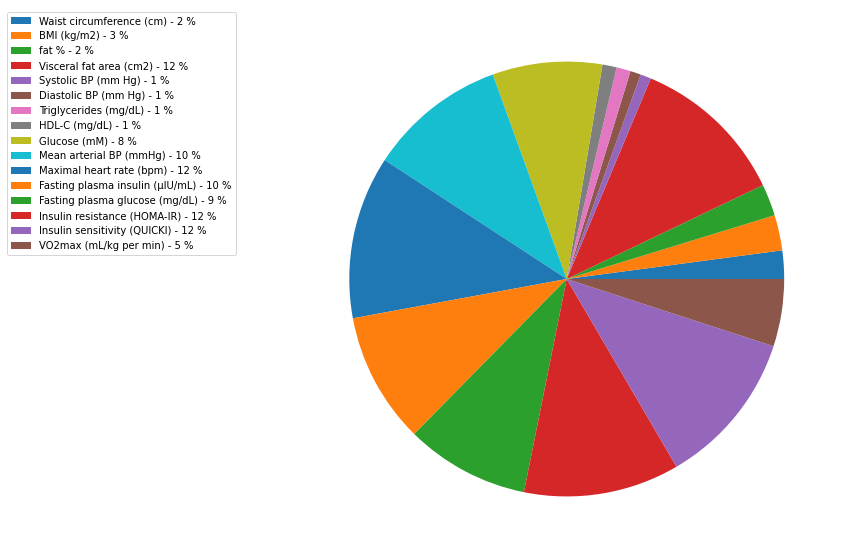

In [9]:
### Pie plot
### some biomarkers include many missing data are removed from the dataset
###### Visceral fat area (cm2), Glucose (mM), Mean arterial BP (mmHg), Maximal heart rate (bpm), Fasting plasma insulin (μIU/mL)
###### Fasting plasma glucose (mg/dL), Insulin resistance (HOMA-IR), Insulin sensitivity (QUICKI)
nan_count = np.array(outcome_var.isna().sum())
missing_count = np.array(outcome_var.isna().sum())
missing_count_perc = (missing_count / missing_count.sum() * 100, 2)
missing_count_perc_round = [round(value) for value in missing_count_perc[0]]
labels = ['{0} - {1:1.0f} %'.format(i,j) for i,j in zip(OV, missing_count_perc_round)]
plt.figure(figsize=(10,10))
plt.pie(nan_count)
plt.legend(labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.show()

In [10]:
### for the target variable, we only examine WC, BMI, fat%, SBP, DBP, TG, VO2max because lack of data for other variables.
lessNAN_OV = ['Waist circumference (cm)', 'BMI (kg/m2)',
       'fat %', 'Systolic BP (mm Hg)',
       'Diastolic BP (mm Hg)', 'Triglycerides (mg/dL)', 'HDL-C (mg/dL)',
       'Glucose (mM)', 'VO2max (mL/kg per min)']

In [12]:
### new df includes desired variables
new_variables = ['Study name', 'Subject nationality or loaction', 'Gender', 'Age',
       'Metabolic syndrome', 'Issue1', 'Issue2', 'Functional test',
       'Diet intervention', 'Resistant training',
       'Resistant training intensity', 'Resistant training repetition',
       'Resistant training frequency', 'Resistant training duration',
       'Aerobic training', 'Aerobic training intensity',
       'Aerobic training duration (time)', 'Aerobic training frequency',
       'Aerobic training duration', 'Total duration', 'pre_waist circumference (cm)',
       'pre_BMI (kg/m2)', 'pre_fat %', 'pre_Systolic BP (mm Hg)', 'pre_Diastolic BP (mm Hg)',
       'pre_Triglycerides (mg/dL)', 'pre_HDL-C (mg/dL)', 'pre_Glucose (mM)','pre_VO2max (mL/kg per min)', 'Waist circumference (cm)', 'BMI (kg/m2)',
       'fat %', 'Systolic BP (mm Hg)','Diastolic BP (mm Hg)', 'Triglycerides (mg/dL)', 'HDL-C (mg/dL)',
       'Glucose (mM)', 'VO2max (mL/kg per min)']
new_df = df[new_variables]
new_df = new_df.drop(['Issue1','Issue2', 'Functional test'], axis = 1)
new_df = new_df.drop(['pre_Glucose (mM)', 'Glucose (mM)'], axis = 1)

In [13]:
#### replace na to 0
#### find out the variables with nan and replace them with 0
replace_na_list = ['pre_waist circumference (cm)',
       'pre_BMI (kg/m2)', 'pre_fat %', 'pre_Systolic BP (mm Hg)',
       'pre_Diastolic BP (mm Hg)', 'pre_Triglycerides (mg/dL)',
       'pre_HDL-C (mg/dL)', 'pre_VO2max (mL/kg per min)',
       'Waist circumference (cm)', 'BMI (kg/m2)', 'fat %',
       'Systolic BP (mm Hg)', 'Diastolic BP (mm Hg)', 'Triglycerides (mg/dL)',
       'HDL-C (mg/dL)', 'VO2max (mL/kg per min)']
for i in replace_na_list:
    new_df[i] = new_df[i].replace(np.nan, 0)
new_df.isna().sum() ### ckecking the missing value

Study name                          0
Subject nationality or loaction     0
Gender                              0
Age                                 0
Metabolic syndrome                  0
Diet intervention                   0
Resistant training                  0
Resistant training intensity        0
Resistant training repetition       0
Resistant training frequency        0
Resistant training duration         0
Aerobic training                    0
Aerobic training intensity          0
Aerobic training duration (time)    0
Aerobic training frequency          0
Aerobic training duration           0
Total duration                      0
pre_waist circumference (cm)        0
pre_BMI (kg/m2)                     0
pre_fat %                           0
pre_Systolic BP (mm Hg)             0
pre_Diastolic BP (mm Hg)            0
pre_Triglycerides (mg/dL)           0
pre_HDL-C (mg/dL)                   0
pre_VO2max (mL/kg per min)          0
Waist circumference (cm)            0
BMI (kg/m2) 

In [16]:
### new_df statistical description 
new_df.describe()
### the variables in this df is taken into account for the further analysis

,Gender,Age,Metabolic syndrome,Diet intervention,Resistant training,Resistant training frequency,Resistant training duration,Aerobic training,Aerobic training duration (time),Aerobic training frequency,...,pre_HDL-C (mg/dL),pre_VO2max (mL/kg per min),Waist circumference (cm),BMI (kg/m2),fat %,Systolic BP (mm Hg),Diastolic BP (mm Hg),Triglycerides (mg/dL),HDL-C (mg/dL),VO2max (mL/kg per min)
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.611278,56.980000,0.880000,0.180000,0.320000,0.84000,5.480000,0.500000,22.020000,1.280000,...,42.730046,18.734800,84.313200,24.485400,28.0016,124.882800,76.409600,143.767840,43.933498,17.675800
std,0.341260,7.271667,0.328261,0.388088,0.471212,1.28349,10.083812,0.505076,22.878998,1.443352,...,13.839411,11.414392,37.953109,12.566658,14.3417,33.028031,20.393586,56.111211,14.373316,14.262447
min,0.000000,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,53.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,44.000000,5.500000,89.250000,26.275000,29.6500,124.515000,75.075000,115.805750,45.257925,0.000000
50%,0.600000,58.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.500000,15.000000,0.500000,...,45.500000,23.800000,99.050000,29.900000,31.8500,133.500000,81.900000,158.000000,46.500000,24.450000
75%,0.818182,61.750000,1.000000,0.000000,1.000000,2.00000,11.000000,1.000000,42.250000,2.000000,...,48.500000,25.100000,105.450000,31.225000,33.9000,139.975000,85.075000,177.005000,49.600000,29.775000
max,1.000000,72.000000,1.000000,1.000000,1.000000,3.00000,48.000000,1.000000,60.000000,5.000000,...,57.200000,32.300000,113.300000,36.350000,64.5000,146.000000,95.700000,242.800000,60.000000,34.600000


### Quantify training and biomarkers

In [21]:
training_variables = ['Resistant training',
       'Resistant training intensity', 'Resistant training repetition',
       'Resistant training frequency', 'Resistant training duration',
       'Aerobic training', 'Aerobic training intensity',
       'Aerobic training duration (time)', 'Aerobic training frequency',
       'Aerobic training duration', 'Total duration']

In [22]:
### quantify the anaerobic training based on the intensity, higher intensity higher the value
new_df['Resistant training intensity'] = new_df['Resistant training intensity'].replace(['0', '40-80%', '80%-90%', '40%-80%', '60%-85%'], [0,1,3,1,2])
new_df['Resistant training intensity'].unique()

array([0, 1, 3, 2], dtype=int64)

In [23]:
### quantify the anaerobic training based on the repetition, higher repetition higher the value
new_df['Resistant training repetition'] = new_df['Resistant training repetition'].replace(['0', '8~20', '5~8', '8~12'], [0,3,1,2])
new_df['Resistant training repetition'].unique()


array([0, 3, 1, 2], dtype=int64)

In [24]:
### quantify the aerobic training based on the intensity, higher intensity higher the value
new_df['Aerobic training intensity'] = new_df['Aerobic training intensity'].replace(['70-85%', '0', '40-65%'], [3,0,1])
new_df['Aerobic training intensity'].unique()

array([3, 0, 1], dtype=int64)

In [25]:
training_df = new_df[training_variables]

In [26]:
resistance_training = ['Resistant training',
       'Resistant training intensity', 'Resistant training repetition',
       'Resistant training frequency', 'Resistant training duration']
aerobic_training = ['Aerobic training', 'Aerobic training intensity',
       'Aerobic training duration (time)', 'Aerobic training frequency',
       'Aerobic training duration']

In [27]:
### define total training volumn of anaerobic training
resistance_training_volume = training_df['Resistant training'] + training_df['Resistant training intensity'] + training_df['Resistant training repetition']+training_df['Resistant training frequency'] + training_df['Resistant training duration']

In [28]:
### define total training volumn of aerobic training
aerobic_training_volume = training_df['Aerobic training'] + training_df['Aerobic training intensity'] + training_df['Aerobic training duration (time)']+training_df['Aerobic training frequency'] + training_df['Aerobic training duration']

In [29]:
### define total training volumn of both training
total_volume = resistance_training_volume + aerobic_training_volume

In [30]:
training_type = []
for i,ii in zip(training_df['Resistant training'], training_df['Aerobic training']):
    if i ==1 and ii ==0:
        training = 'resistance_training'
    elif i ==0 and ii == 1:
        training = 'aerobic_training'
    elif i == 1 and ii == 1:
        training = 'combination_training'
    elif i == 0 and ii == 0:
        training = 'None'
    training_type.append(training)

In [31]:
new_df['training_type'] = training_type
new_df['total_training_volume'] = total_volume
new_df['resistance_training_volume'] = resistance_training_volume
new_df['aerobic_training_volume'] = aerobic_training_volume

### Quantify the biomarker change

In [32]:
### biomarker change
pre = ['pre_waist circumference (cm)',
       'pre_BMI (kg/m2)', 'pre_fat %', 'pre_Systolic BP (mm Hg)', 'pre_Diastolic BP (mm Hg)',
       'pre_Triglycerides (mg/dL)', 'pre_HDL-C (mg/dL)', 'pre_VO2max (mL/kg per min)']
post = ['Waist circumference (cm)', 'BMI (kg/m2)',
       'fat %', 'Systolic BP (mm Hg)','Diastolic BP (mm Hg)', 'Triglycerides (mg/dL)', 'HDL-C (mg/dL)',
       'VO2max (mL/kg per min)']
change = ['change_Waist circumference (cm)', 'change_BMI (kg/m2)',
       'change_fat %', 'change_Systolic BP (mm Hg)','change_Diastolic BP (mm Hg)', 'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)',
       'change_VO2max (mL/kg per min)']

In [33]:
for pr, po,ch in zip(pre, post, change):
    new_df[ch] = new_df[po] - new_df[pr]
new_df.head()

,Study name,Subject nationality or loaction,Gender,Age,Metabolic syndrome,Diet intervention,Resistant training,Resistant training intensity,Resistant training repetition,Resistant training frequency,...,resistance_training_volume,aerobic_training_volume,change_Waist circumference (cm),change_BMI (kg/m2),change_fat %,change_Systolic BP (mm Hg),change_Diastolic BP (mm Hg),change_Triglycerides (mg/dL),change_HDL-C (mg/dL),change_VO2max (mL/kg per min)
0,Tomohiro,Japan,0.0,55,1,1,0,0,0,0,...,0,66,0.00,-3.40,0.00,-14.00,-8.00,-97.43,3.10,4.10
1,Tomohiro,Japan,0.0,52,1,1,0,0,0,0,...,0,0,0.00,-3.30,0.00,-17.00,-4.00,-47.83,1.17,1.40
2,Vahid,Iran,1.0,54,1,0,0,0,0,0,...,0,58,-1.64,-0.66,-1.76,-8.72,-6.00,-28.18,0.09,4.78
3,Vahid,Iran,1.0,54,1,0,0,0,0,0,...,0,66,-3.44,-1.14,-3.11,-12.72,-11.91,-43.45,1.18,4.89
4,Vahid,Iran,1.0,54,1,0,0,0,0,0,...,0,8,0.09,0.16,0.37,0.09,0.82,0.09,0.09,0.19


In [34]:
new_df = new_df.drop(['Study name'], axis = 1)

## Answering question

### What is the effect of different dependent variables on different biomarkers?

* The association between age and biomarkers change

In [37]:
age_df = new_df[['Age', 'change_Waist circumference (cm)', 'change_BMI (kg/m2)', 'change_fat %',
       'change_Systolic BP (mm Hg)', 'change_Diastolic BP (mm Hg)',
       'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)',
       'change_VO2max (mL/kg per min)']]

In [38]:
age_df.corr()['Age']

Age                                1.000000
change_Waist circumference (cm)    0.136703
change_BMI (kg/m2)                 0.110963
change_fat %                       0.089857
change_Systolic BP (mm Hg)         0.091382
change_Diastolic BP (mm Hg)       -0.094301
change_Triglycerides (mg/dL)       0.194900
change_HDL-C (mg/dL)               0.095177
change_VO2max (mL/kg per min)     -0.196905
Name: Age, dtype: float64

* The association between diet intervention and biomarkers change

In [39]:
diet_df = new_df[['Diet intervention', 'change_Waist circumference (cm)', 'change_BMI (kg/m2)', 'change_fat %',
       'change_Systolic BP (mm Hg)', 'change_Diastolic BP (mm Hg)',
       'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)',
       'change_VO2max (mL/kg per min)']]

In [40]:
change_variables=['change_Waist circumference (cm)', 'change_BMI (kg/m2)', 'change_fat %',
       'change_Systolic BP (mm Hg)', 'change_Diastolic BP (mm Hg)',
       'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)',
       'change_VO2max (mL/kg per min)']

CV = ['WC (cm)', 'BMI (kg/m2)', 'fat %',
       'SBP (mm Hg)', 'DBP (mm Hg)',
       'Triglycerides (mg/dL)', 'HDL-C (mg/dL)',
       'VO2max (mL/kg per min)']

In [41]:
corr_values = diet_df.corr()['Diet intervention'][change_variables]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

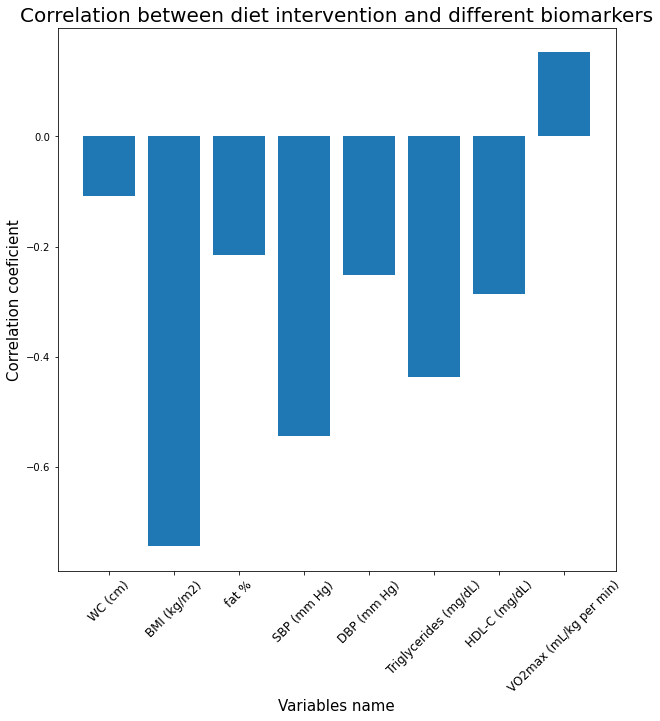

In [42]:
fig = plt.figure(figsize = (10,10))
plt.bar(CV, corr_values)
plt.title('Correlation between diet intervention and different biomarkers', fontsize = 20)
plt.ylabel('Correlation coeficient', fontsize = 15)
plt.xlabel('Variables name', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 12)

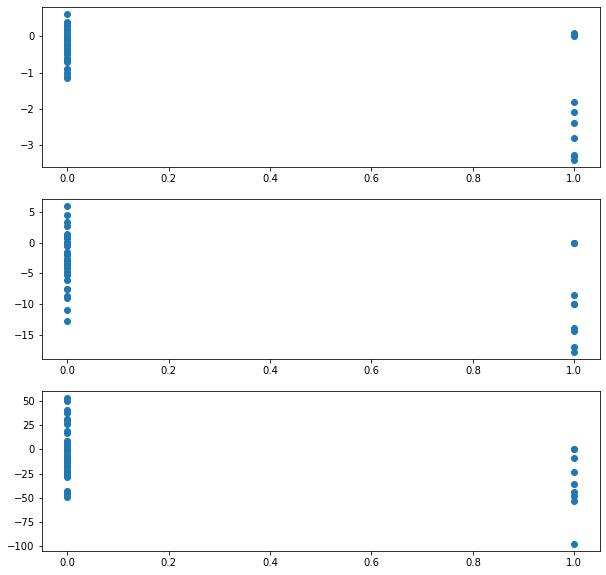

In [43]:
subfig, ax = plt.subplots(3, figsize = (10,10))
ax[0].scatter(diet_df['Diet intervention'], diet_df['change_BMI (kg/m2)'])
ax[1].scatter(diet_df['Diet intervention'], diet_df['change_Systolic BP (mm Hg)'])
ax[2].scatter(diet_df['Diet intervention'], diet_df['change_Triglycerides (mg/dL)'])

* The association between overall exercise and biomarkers change

In [44]:
exercise_df = new_df[['Total duration', 'total_training_volume','training_type', 'change_Waist circumference (cm)', 'change_BMI (kg/m2)', 'change_fat %',
       'change_Systolic BP (mm Hg)', 'change_Diastolic BP (mm Hg)',
       'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)',
       'change_VO2max (mL/kg per min)']]

In [45]:
corr_values = exercise_df.corr()['total_training_volume'].loc[change_variables]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

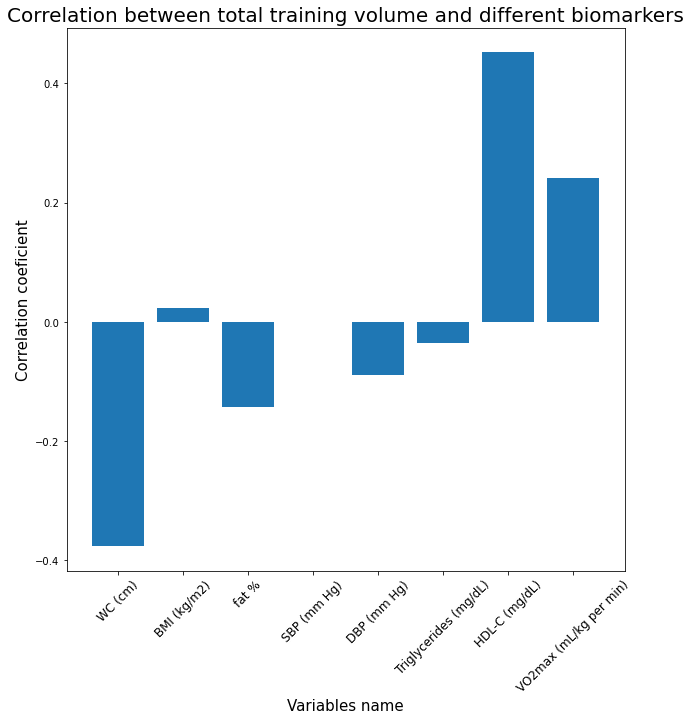

In [46]:
fig = plt.figure(figsize = (10,10))
plt.bar(CV, corr_values)
plt.title('Correlation between total training volume and different biomarkers', fontsize = 20)
plt.ylabel('Correlation coeficient', fontsize = 15)
plt.xlabel('Variables name', fontsize = 15)
plt.xticks(rotation = 45, fontsize = 12)

Text(0.5, 1.0, 'The correlation between training volume and change of WC')

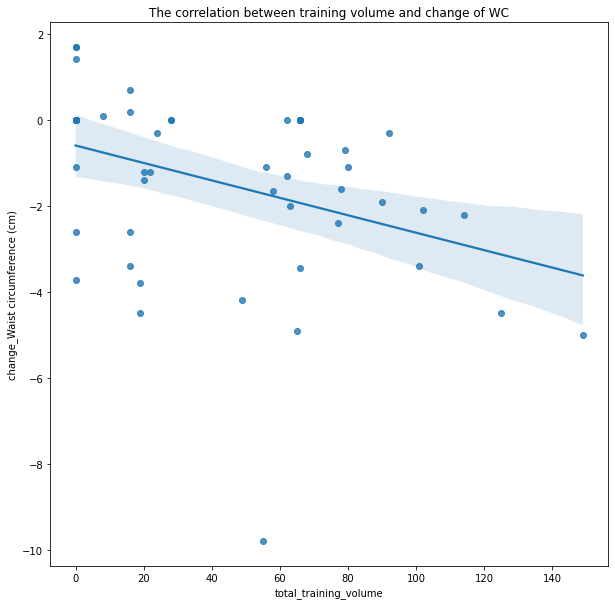

In [47]:
fig= plt.figure(figsize = (10,10))

sns.regplot(x = 'total_training_volume', y = 'change_Waist circumference (cm)', data = exercise_df)
plt.title("The correlation between training volume and change of WC")


Text(0.5, 1.0, 'The correlation between training volume and change of HDL-C')

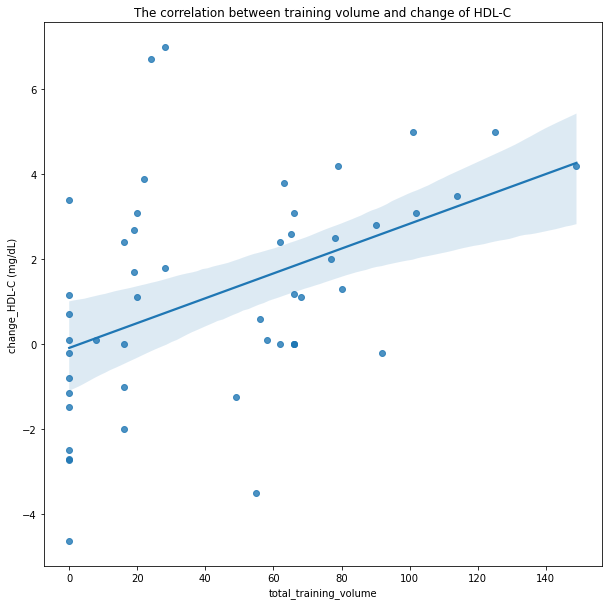

In [48]:
fig= plt.figure(figsize = (10,10))
sns.regplot( x = 'total_training_volume', y = 'change_HDL-C (mg/dL)',  data = exercise_df)
plt.title("The correlation between training volume and change of HDL-C")

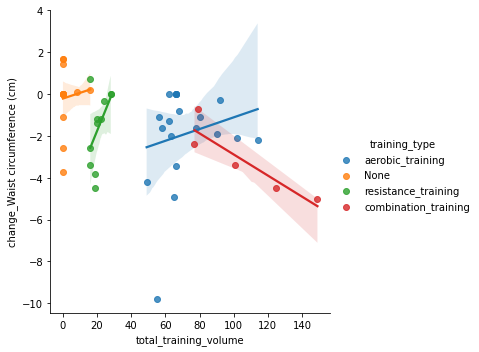

In [49]:
sns.lmplot(x = 'total_training_volume', y = 'change_Waist circumference (cm)', hue = 'training_type', data = exercise_df)

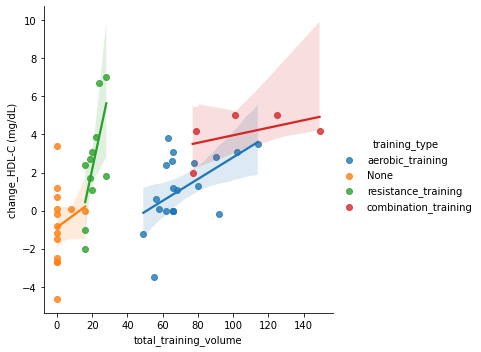

In [50]:
sns.lmplot(x = 'total_training_volume', y = 'change_HDL-C (mg/dL)', hue = 'training_type', data = exercise_df)

* The association between resistance training and biomarkers change

In [51]:
resistance_training_df = new_df[['Resistant training', 'Resistant training intensity', 'Resistant training repetition',
       'Resistant training frequency', 'Resistant training duration', 'resistance_training_volume', 'total_training_volume','training_type', 
        'change_Waist circumference (cm)', 'change_BMI (kg/m2)', 'change_fat %', 'change_Systolic BP (mm Hg)', 'change_Diastolic BP (mm Hg)',
       'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)','change_VO2max (mL/kg per min)']]

In [52]:
corr_df = resistance_training_df.corr()[['Resistant training intensity', 'Resistant training repetition',
       'Resistant training frequency', 'Resistant training duration', 'resistance_training_volume']].loc[change_variables]

Text(0.5, 1.0, 'The association between resistance training and the change of biomarkers related to metabolic syndrome')

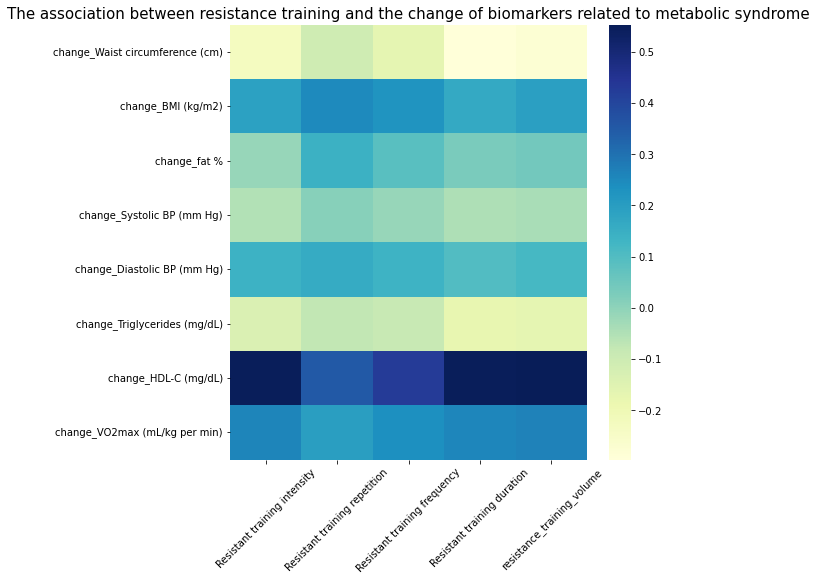

In [53]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('The association between resistance training and the change of biomarkers related to metabolic syndrome', fontsize = 15)

* The association between aerobic training and biomarkers change

In [54]:
aerobic_training_df = new_df[['Aerobic training', 'Aerobic training intensity',
       'Aerobic training duration (time)', 'Aerobic training frequency',
       'Aerobic training duration', 'aerobic_training_volume', 'total_training_volume','training_type', 
        'change_Waist circumference (cm)', 'change_BMI (kg/m2)', 'change_fat %', 'change_Systolic BP (mm Hg)', 'change_Diastolic BP (mm Hg)',
       'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)','change_VO2max (mL/kg per min)']]

In [55]:
corr_df = aerobic_training_df.corr()[['Aerobic training intensity',
       'Aerobic training duration (time)', 'Aerobic training frequency', 'Aerobic training duration', 'aerobic_training_volume']].loc[change_variables]

Text(0.5, 1.0, 'The association between aerobic training and the change of biomarkers related to metabolic syndrome')

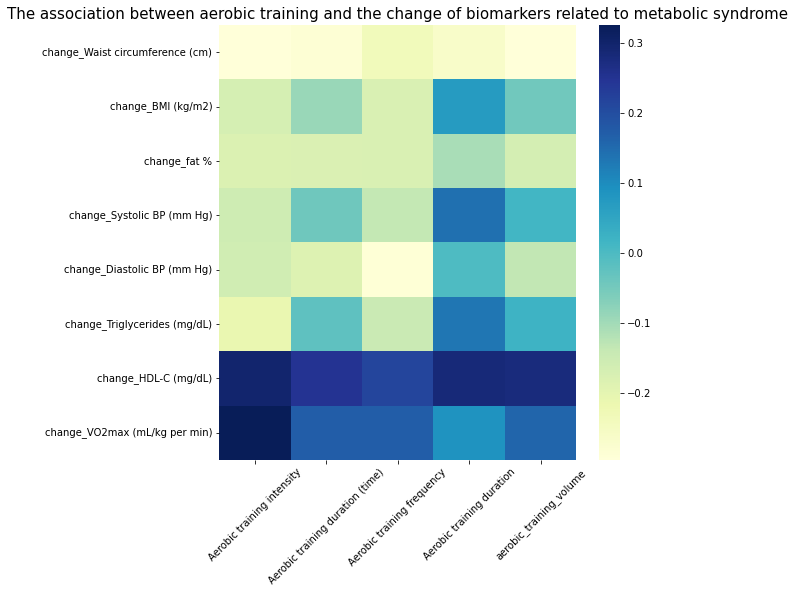

In [56]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('The association between aerobic training and the change of biomarkers related to metabolic syndrome', fontsize = 15)

* Comaprison between resistance training and aerobic training

In [57]:
comparison_training_df = new_df[['Resistant training', 'Resistant training intensity', 'Resistant training repetition',
       'Resistant training frequency', 'Resistant training duration', 'resistance_training_volume', 'Aerobic training', 'Aerobic training intensity',
       'Aerobic training duration (time)', 'Aerobic training frequency',
       'Aerobic training duration', 'aerobic_training_volume', 'total_training_volume','training_type', 
        'change_Waist circumference (cm)', 'change_BMI (kg/m2)', 'change_fat %', 'change_Systolic BP (mm Hg)', 'change_Diastolic BP (mm Hg)',
       'change_Triglycerides (mg/dL)', 'change_HDL-C (mg/dL)','change_VO2max (mL/kg per min)']]

In [58]:
corr_df = comparison_training_df.corr()[['Resistant training intensity', 'Resistant training repetition',
       'Resistant training frequency', 'Resistant training duration', 'resistance_training_volume', 'Aerobic training intensity',
       'Aerobic training duration (time)', 'Aerobic training frequency', 'Aerobic training duration', 'aerobic_training_volume']].loc[change_variables]

Text(0.5, 1.0, 'The comparison between resistance training and aerobic training')

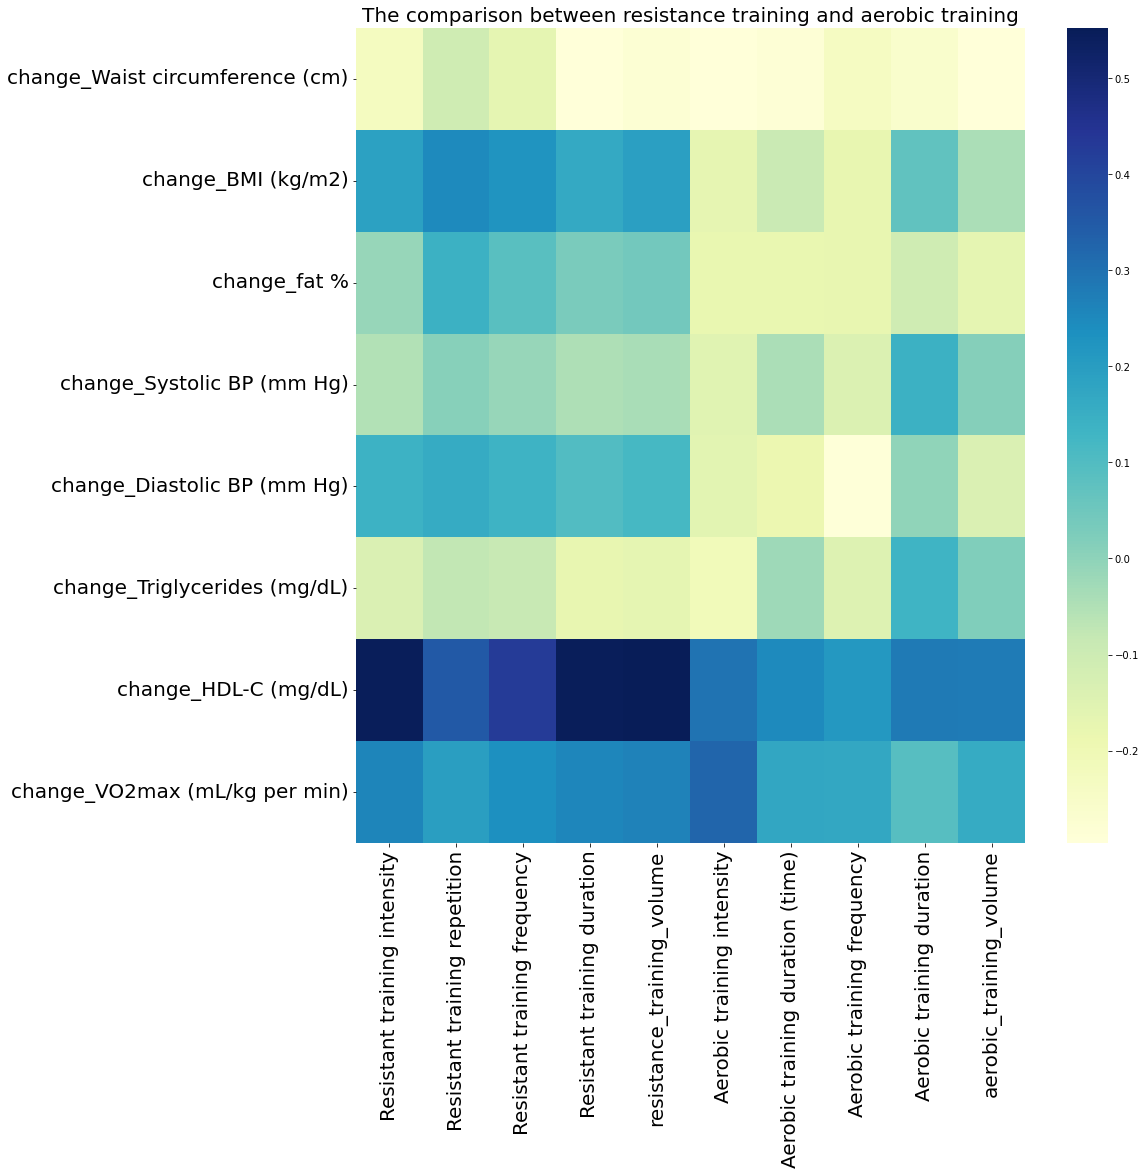

In [59]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr_df, cmap="YlGnBu")
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('The comparison between resistance training and aerobic training', fontsize = 20)
